In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('facebooklive.csv')
X=df[['num_shares','num_loves']]
S=StandardScaler()
X_scaled=S.fit_transform(X)

In [4]:
def dis_calculate(point1,point2):
    v=(point1[0]-point2[0])**2+(point1[1]-point2[1])**2
    return(v)

[14100.          5872.26053035  3160.82752157  2456.72070546
  2036.46336059  1776.18609801  1428.2051021   1200.52463961
  1063.01073102   953.5310222    850.66167041   801.8827958
   740.19176321   686.85129517   650.78094064   586.5897165
   548.79903816   519.72952506   488.35324794   462.13516264]


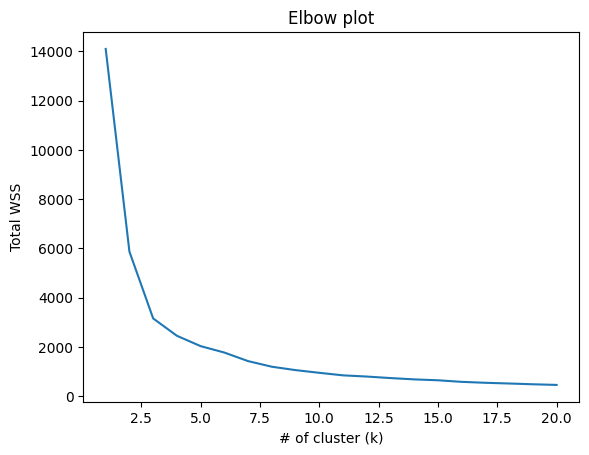

In [5]:
v=np.zeros(20)
for k in range(1,21):
    mymodel=KMeans(n_clusters=k,random_state=42)
    km=mymodel.fit(X_scaled)
    Y=km.labels_#labels=0 to k-1
    #print(Y)
    new_arr=np.column_stack((X_scaled,Y))
    #print(new_arr)#column 1, column 2: features; column 3: labels
    Yc=km.cluster_centers_
    #print(Yc)
    #v=0
    for i in range(len(new_arr)):
        label=int(new_arr[i,2])
        v[k-1]=v[k-1]+dis_calculate(new_arr[i,0:2],Yc[label,:]) 
print(v) 
plt.plot(range(1,21),v)
plt.title('Elbow plot')
plt.xlabel('# of cluster (k)')
plt.ylabel('Total WSS') 
plt.show() 